<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/%ED%95%84%EC%82%AC/kaggle_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기본 분류 : 의류 이미지 분류

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


## 패션 MNIST 데이터셋 임포트하기

패션 MNIST 데이터셋 : 10개의 범주와 70000개의 흑백 이미지로 구성됨. 이미지는 해상도가 낮고 개별 옷 품목을 나타냄

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


* train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
* test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트

각 옷의 레이블과 클래스

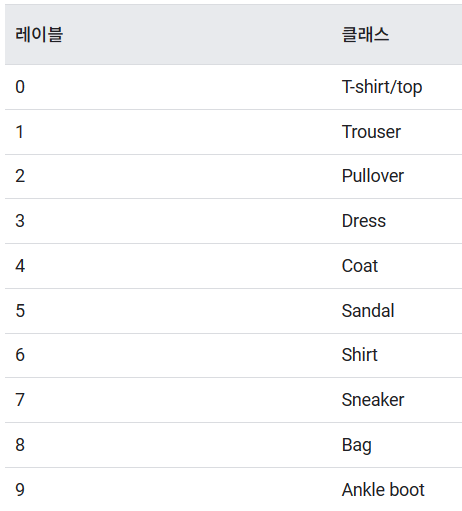

In [4]:
# 데이터셋에 클래스 이름이 없기 때문에 별도의 변수 생
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

-> 훈련 세트 : 60000개의 이미지가 있고 각 이미지는 28*28 픽셀로 표현됨

In [6]:
len(train_labels)

60000

-> 훈련 세트 : 60000개의 레이블이 있음

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

-> 각 레이블은 0과 9 사이의 정수

In [8]:
test_images.shape

(10000, 28, 28)

-> 테스트 세트 : 10000개의 이미지가 있음. 28*28 픽셀로 표현됨

In [9]:
len(test_labels)

10000

-> 테스트 세트 : 10000개의 이미지에 대한 레이블을 가짐

## 데이터 전처리

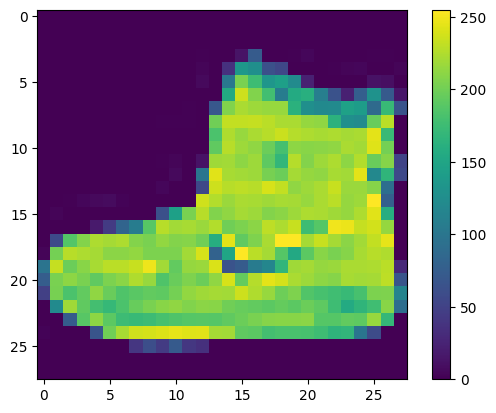

In [10]:
# 훈련 세트에 있는 첫번째 이미지
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

-> 픽셀 값의 범위가 0~255

In [11]:
# 값의 범위를 0~1사이로 조정
train_images = train_images / 255.0

test_images = test_images / 255.0

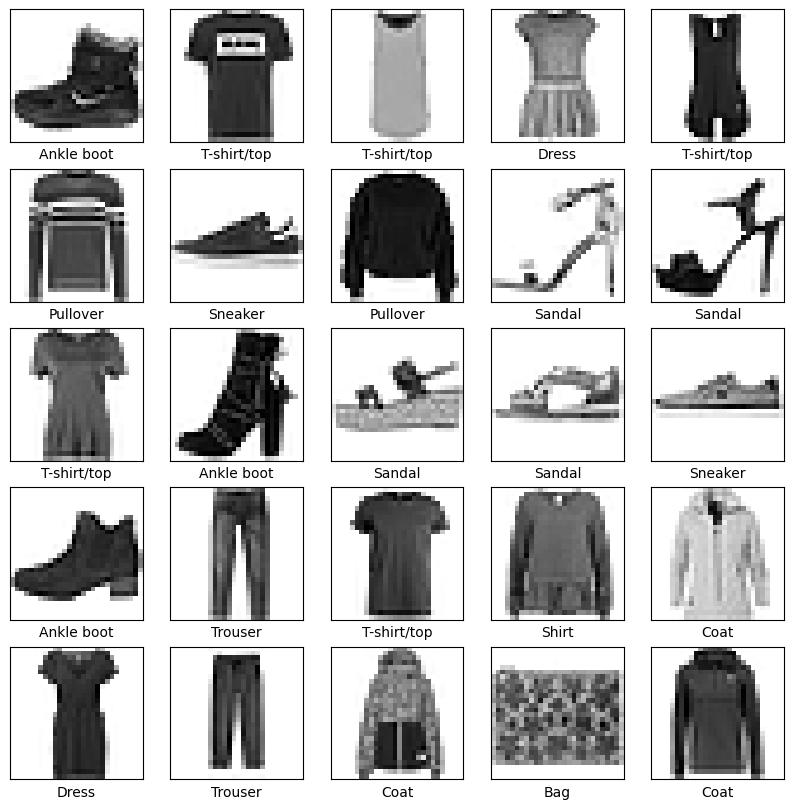

In [12]:
# 데이터 포맷 확인
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

### 층 설정

레이어 : 신경망 기본 빌딩 블록. 레이어는 레이어에 공급된 데이터로부터 표현을 추출함

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### 모델 컴파일

* 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 함
* 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식
* 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련

신경망 모델 훈련 단계

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인합니다.

### 모델 피드

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4942 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3743 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3379 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3112 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2940 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2804 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2667 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2567 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2464 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - lo

-> 약 0.88 정도의 정확도 달성

### 정확도 평가

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3215 - accuracy: 0.8883 - 655ms/epoch - 2ms/step

Test accuracy: 0.8883000016212463


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음 -> 과대적합 때문

과대적합 : 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상

### 예측하기

In [17]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [19]:
# 첫번째 예측 확인
predictions[0]

array([1.10829006e-07, 2.44698195e-09, 1.02896491e-08, 4.75590545e-09,
       6.00874387e-07, 1.57483981e-03, 1.09010978e-06, 4.23075492e-03,
       3.80248082e-08, 9.94192481e-01], dtype=float32)

In [20]:
# 가장 신뢰도가 높은 레이블
np.argmax(predictions[0])

9

In [21]:
# 테스트 레이블 확인
test_labels[0]

9

In [23]:
# 그래프 시각화
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인

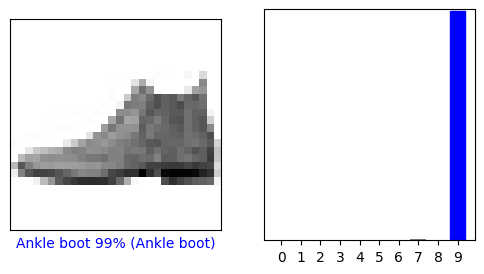

In [24]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

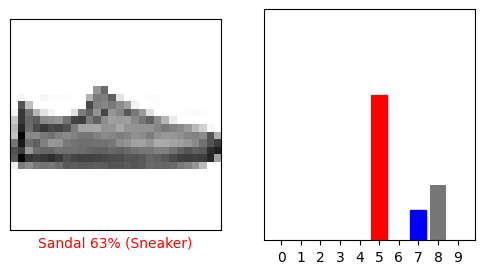

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

올바르게 예측된 레이블 : 파란색

잘못 예측된 레이블 : 빨강색

숫자 : 레이블의 신뢰도 퍼센트. 신뢰도 점수가 높을 때도 잘못 예측할 수 있음

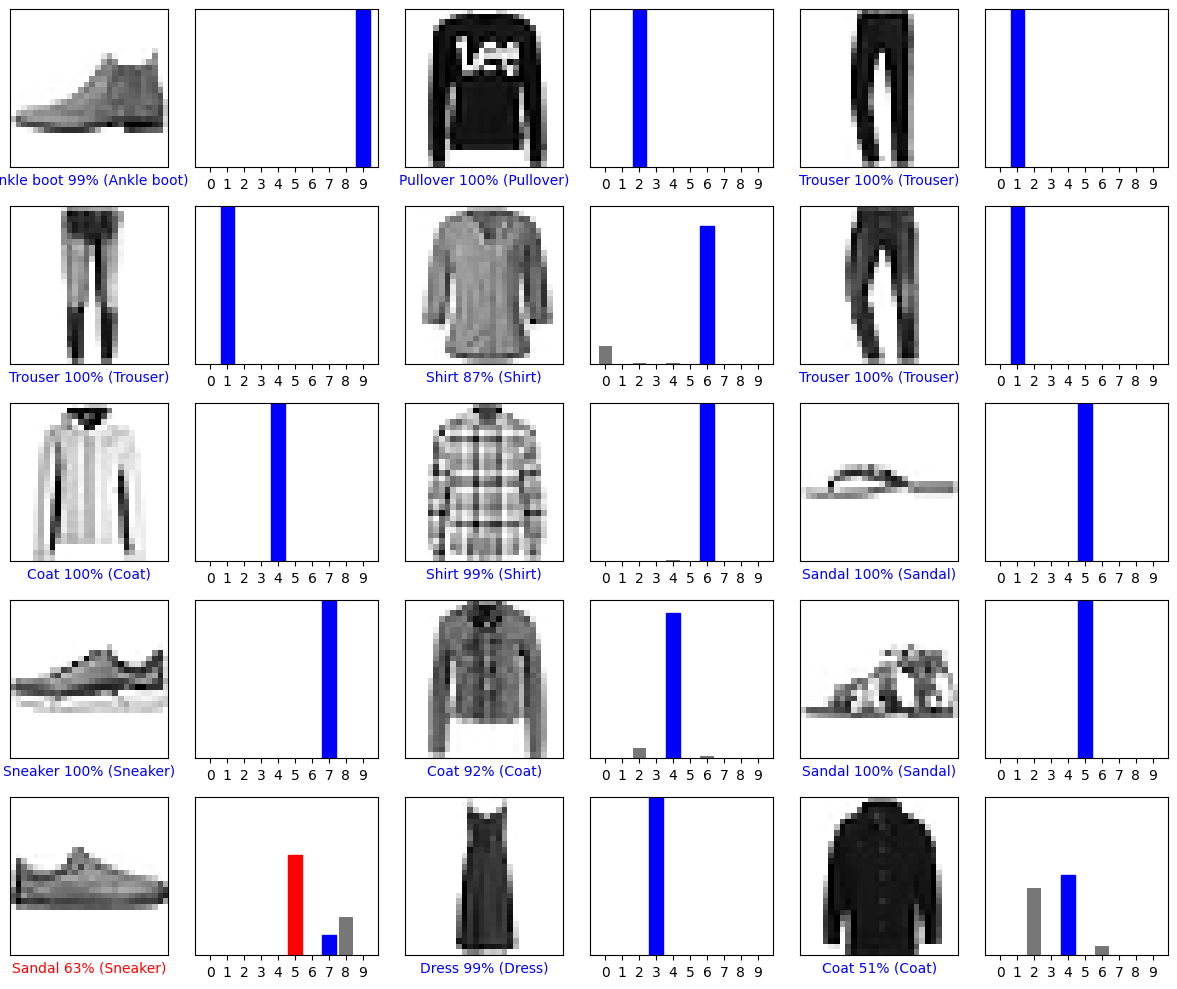

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
# 이미지의 예측 만들기
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 34ms/step
[[2.1510024e-04 9.4550659e-13 9.9521458e-01 2.7318339e-10 3.6192690e-03
  3.9808434e-13 9.5096306e-04 7.9297739e-13 3.9533941e-08 9.0515567e-14]]


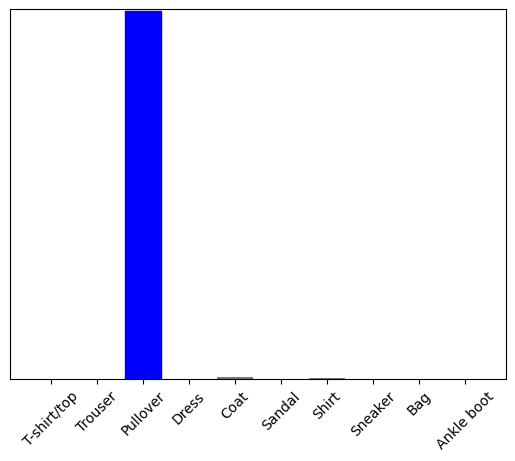

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
# 배치에서 유일한 이미지에 대한 예측
np.argmax(predictions_single[0])

2

-> 예상과 같이 모델이 레이블 예측